In [798]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt


This section is incomplete and should be ignored. I attempted to see if LLMs can learn patterns in lists of numbers,

In [ ]:
import random
import sympy

def median_generator(n, max_val, prime):
    """
    Generate a sorted list of length 2n+1 where the median is either prime or not prime.
    
    Parameters:
    n (int): The number defining the length of the list as 2n+1.
    max_val (int): The maximum value from which numbers can be randomly selected.
    prime (bool): If True, the median will be a prime number; otherwise, it will not be prime.

    Returns:
    list: A sorted list of length 2n+1 with the specified properties.
    """
    # Helper function to generate a random prime number
    def generate_prime(max_val):
        while True:
            num = random.randint(1, max_val)
            if sympy.isprime(num):
                return num

    # Helper function to generate a random non-prime number
    def generate_non_prime(max_val):
        while True:
            num = random.randint(1, max_val)
            if not sympy.isprime(num):
                return num

    # Generate the median based on the 'prime' parameter
    if prime:
        median = generate_prime(max_val)
    else:
        median = generate_non_prime(max_val)

    # Generate random numbers for the rest of the list
    random_numbers = [random.randint(1, max_val) for _ in range(2 * n)]

    # Insert the median into the correct position to maintain the sorted order
    random_numbers.append(median)
    random_numbers.sort()

    return random_numbers

# Example usage
print(median_generator(3, 50, True))  # Example with prime median
print(median_generator(3, 50, False)) # Example with non-prime median



In [ ]:
median_generator(2, 100, True)

In [ ]:
def make_list(max_length, max_val, prime):
    """
    Create a list containing a prime number and two sorted sublists: one in the range [1, prime-1]
    and another in the range [prime+1, max_val]. Each sublist is of size min(max_length, prime-1)
    or min(max_length, max_val-prime) respectively.

    Parameters:
    max_length (int): The maximum length of each sublist.
    max_val (int): The maximum value for the prime number and the upper bound of the range.
    prime (bool): If True, includes a prime number in the list.

    Returns:
    list: A list containing a prime number and two sorted sublists.
    """
    # Helper function to generate a random prime number
    def generate_prime(max_val):
        while True:
            num = random.randint(1, max_val)
            if sympy.isprime(num):
                return num

    # Helper function to generate a random non-prime number
    def generate_non_prime(max_val):
        while True:
            num = random.randint(1, max_val)
            if not sympy.isprime(num):
                return num

    # Generate a random prime number within the range
    if prime:
        median = generate_prime(max_val)
    else:
        median = generate_non_prime(max_val)
    
    # Generate the two sorted sublists
    sublist1 = sorted(random.sample(range(1, median), min(max_length, median-1,max_val - median)))
    sublist2 = sorted(random.sample(range(median + 1, max_val + 1), min(max_length, median-1,max_val - median)))

    return sublist1 + [median] + sublist2

# Test the function
print(make_list(5, 50, True))  # Example with prime included
print(make_list(5, 50, False)) # Example without prime (should return an empty list)

In [ ]:
def make_list(max_length, max_val, prime):
    """
    Create a list containing a prime number and two sorted sublists: one in the range [1, prime-1]
    and another in the range [prime+1, max_val]. Each sublist is of size min(max_length, prime-1)
    or min(max_length, max_val-prime) respectively.

    Parameters:
    max_length (int): The maximum length of each sublist.
    max_val (int): The maximum value for the prime number and the upper bound of the range.
    prime (bool): If True, includes a prime number in the list.

    Returns:
    list: A list containing a prime number and two sorted sublists.
    """
    # Helper function to generate a random prime number
    def generate_prime(max_val):
        while True:
            num = random.randint(1, max_val)
            if sympy.isprime(num):
                return num

    # Helper function to generate a random non-prime number
    def generate_non_prime(max_val):
        while True:
            num = random.randint(1, max_val)
            if not sympy.isprime(num):
                return num
    
    lst = sorted(random.sample(range(1, max_val), max_length))
    
    if prime:
        el = generate_prime(max_val)
    else:
        el = generate_non_prime(max_val)

    return [el]+lst

# Test the function
print(make_list(5, 50, True))  # Example with prime included
print(make_list(5, 50, False)) # Example without prime (should return an empty list)

In [ ]:
for _ in range(100000):
    lst=make_list(5, 100, True)
    if not sympy.isprime(lst[len(lst)//2]):
        print("DANGER")
    break

In [ ]:
for _ in range(100000):
    lst=make_list(5, 100, False)
    if sympy.isprime(lst[len(lst)//2]):
        print("DANGER")

In [ ]:
def make_list(max_length, max_val, even):
    """
    Create a list containing a prime number and two sorted sublists: one in the range [1, prime-1]
    and another in the range [prime+1, max_val]. Each sublist is of size min(max_length, prime-1)
    or min(max_length, max_val-prime) respectively.

    Parameters:
    max_length (int): The maximum length of each sublist.
    max_val (int): The maximum value for the prime number and the upper bound of the range.
    prime (bool): If True, includes a prime number in the list.

    Returns:
    list: A list containing a prime number and two sorted sublists.
    """
    # Helper function to generate a random prime number
    def generate_num(even): 
        while True:
            num = random.randint(1,max_val)
            if even and num%2==0:
                return num
            if not even and num%2==1:
                return num
    
    el = generate_num(even)
    lst = random.sample(range(1, max_val), max_length)
    return [el]+lst

# Test the function
def create_example(max_length,max_val):
    is_even = random.randint(0,1)
    return (make_list(max_length,max_val,is_even),is_even)

def generate_lsts(num_examples, max_length,max_val):
    results = []
    for _ in range(num_examples):
        results.append(create_example(max_length,max_val))
    return results

def convert_to_str(example):
    return f'Input: {str(example[0])}, Output: {str(bool(example[1]))}'

def convert_all(examples):
    return list(map(lambda x:convert_to_str(x),examples))

examples = generate_lsts(5, 5,1000)

print('\n'.join(convert_all(examples)))

In [ ]:
import os
from openai import OpenAI
API_KEY = os.getenv('OPENAI_API_KEY')  # Retrieve API key from environment variable
client = OpenAI(api_key=API_KEY)



def get_gpt_response(num_examples, max_length,max_val):
    
    examples = generate_lsts(num_examples, max_length, max_val)
    
    system_message = """I will give you a series of input and output pairs. The input is a list and the output is either True or False.
    You need to predict the output for the final list. The prediction should be the string 'True' or 'False' and nothing else. 
    Please output the result in the following format:
    
    REASONING: {{{Put your reasoning for your answer here. Please think step by step.}}}
    PREDICTION: {{{prediction}}}
    
    Note that your reasoning should work for every example I give you. If the rule does not work for every example, it is not valid.
    
    """
    system_message += '\n'+'\n'.join(convert_all(examples))
    print('\n'.join(convert_all(examples)))
    
    last = create_example(max_length, 
                   max_val)
    
    prompt = f'Input: {last[0]}, Output: '
    
    response = client.chat.completions.create(
        messages=[
            {"role": "system", "content": system_message},
            {"role": "user", "content": prompt},
        ],
        model="gpt-4",
        temperature=0,
    )
    res = response.choices[0].message.content
    return (res,bool(last[1]))

In [ ]:
get_gpt_response(20, 1,100)

# English Spelling

## Set-up

In [820]:
def convert_example(example):
    return f'Input: {example[0]} ### Output: {example[1]}'
def convert_all(examples):
    lst = list(map(convert_example,examples))
    return '\n'.join(lst)

In [814]:
sentence_list=[('The center was closed on Saturday', True),
 ('I need to organize my schedule.', True),
 ('The colour of the sky is beautiful.', False),
 ('She will practise piano tomorrow.', False),
 ('Check the tire pressure.', True),
 ('The theater was packed with people.', True),
 ('I love the flavor of this ice cream.', True),
 ("It's my favourite movie of all time.", False),
 ('She realized she was lost.', True),
 ('The program was updated successfully.', True),
 ('Honour your commitments.', False),
 ('He specializes in marine biology.', True),
 ('Traveling can be very enlightening.', True),
 ('The defence was well-prepared.', False),
 ('Check the catalog for more items.', True),
 ('It was an arduous endeavour.', False),
 ('Her favorite genre is fantasy.', True),
 ('The tyre burst on the highway.', False),
 ('Analyze the data carefully.', True),
 ('The colours of the flag are vibrant.', False),
 ('She has a marvellous sense of style.', False),
 ('The humor in the book is subtle.', True),
 ('His behaviour was quite unusual.', False),
 ('We need to finalize the report.', True),
 ('The metre of the poem is irregular.', False),
 ('Organize the files by category.', True),
 ('She will analyse the results tomorrow.', False),
 ('His favorite movie is a classic comedy.', True),
 ('The neighbour was very kind and helpful.', False),
 ('The airplane took off amidst the clouds.', True),
 ('The flavour of the cake was exquisite.', False),
 ('They will honor the agreement.', True),
 ('The tyres need to be checked regularly.', False),
 ('Customize the settings to your preference.', True),
 ('She has a splendid sense of humour.', False)]

more_sents = [
    ("The centre had lots of great shopping", "False"), 
    ("We took the lift to the fifth floor", "False"),
    ("It was an organisation filled with diverse people", "False"),
    ("His behavior was strange during the meeting", "True"),
    ("She put on gray pants and a vest", "True"),
    ("We enjoyed travelling across the country", "False"),
    ("The theater had beautiful drapes", "True"),
    ("She wore pyjamas to bed every night", "False"), 
    ("He carried a flashlight when walking home at night", "True"),
    ("The neighbourhood was filled with colourful houses", "False"), 
    ("I love eating glazed donuts", "True"),
    ("The jewellery store had a holiday sale", "False"),
    ("The cancel button did not work properly", "True"),
    ("It requires a lot of labour to dig a well", "False"),
    ("I sent her an email yesterday", "True"),
    ("The candies were quite flavourful", "False"), 
    ("He put on pants, a sweater, and sneakers", "True"),
    ("The defence played very aggressively", "False"),
    ("I enjoyed the yogurt flavoured crisps", "False"),
]

more_examps_gpt = [
    ("Traveling across the country, she marveled at the diverse landscapes.", True),
    ("He will finalize the report before the weekend.", True),
    ("The jewelry store had an amazing array of choices.", True),
    ("The defense attorney argued passionately for his client.", True),
    ("The center of the city is bustling with activity.", True),
    ("She checked her calendar to schedule the meeting.", True),
    ("The cozy coffee shop on the corner is my go-to spot.", True),
    ("His tire had a puncture and needed to be replaced.", True),
    ("The theater was crowded for the movie premiere.", True),
    ("Travelling through the countryside, she marvelled at the historical architecture.", False),
    ("He shall finalise the document by Friday.", False),
    ("Her favourite flavour of ice cream is strawberry.", False),
    ("The defence barrister presented a compelling argument.", False),
    ("The centre of town was alive with festivities.", False),
    ("She checked her diary to organise a meeting.", False),
    ("The cosy room was very cute.", False),
    ("His tyre had a flat and needed changing.", False),
]

more_examps_claude = [
    ("The organization of the event required careful planning and coordination.", True),
    ("His behavior at the party was somewhat obnoxious.", True), 
    ("The pediatrician has over twenty years of experience caring for children.", True),
    ("The growing economy has fueled an increase in jobs and consumer spending.", True),
    ("The archeology student was fascinated by the ancient civilization.", True),
    ("The theater hosted a film festival featuring independent movies.", True),
    ("The counselors provided guidance to students throughout the semester.", True),
    ("The aluminum baseball bats were lighter than traditional wooden bats.", True),
    ("The farmers are preparing the plowed fields for the new crops.", True),
    ("The tire pressure on my car seems low, I should get it checked.", True),
    ("The programme focused on providing education to underprivileged children.", False),
    ("The neighbours held a street party to welcome new families.", False),
    ("The theatre group put on an impressive production of the classic play.", False),  
    ("The local council has introduced new waste management procedures.", False),
    ("The paediatrician has specialised in childhood illnesses and development.", False),
    ("The organisation relies heavily on volunteers and donations.", False),
    ("The behaviour of the fans was widely criticised after the match.", False),
    ("The artefacts from the excavation site will be displayed in the museum.", False),
    ("The harbour was expanded to accommodate larger cruise ships.", False)
]


even_more_claude = [
("The organization provided assistance to families in need after the flooding.", True),
("The professor's unique teaching style was quite controversial among students.", True),
("The pediatric surgeon has performed thousands of successful operations.", True),
("The archeologists uncovered fossils dating back millions of years.", True),
("The counselor helped students deal with personal issues affecting their studies.", True),
("The theater hosted a variety show with singing, dancing and comedy routines.", True),

("The aluminum cans were recycled at the facility.", True),
("The farmers are investing in new equipment to increase productivity.", True),
("I should probably get my tire rotated during my next oil change.", True),
("The paediatric department is expanding to accommodate more patients.", False),
("The programme taught practical job skills to unemployed individuals.", False),
("The neighbourhood held a yard sale to raise funds for the school.", False),
("The theatre troupe rehearsed daily in preparation for their next show.", False),
("The local council approved plans for more affordable housing units.", False),
("The organisation campaigned to raise awareness of childhood diseases.", False),
("The behaviour of the celebrity was offensive to many viewers.", False),
("The artefacts will be carefully cleaned and catalogued by the museum staff.", False),
("The harbour was temporarily closed due to dangerous weather conditions.", False),
("The government’s policies on immigration have been widely debated.", False),
("The orthopaedic surgeon specialises in sports injuries and fractures.", False),

("The neighbours organised a petition against the new property development.", False),
("The economics programme outlined strategies for improving employment levels.", False),
("The organisation’s fundraising campaign was very successful this year.", False),
("The theatre group rehearsed all week for their upcoming performance.", False),
("The paediatric nurse has over 10 years of experience caring for children.", False)
]

sentences = sentence_list+more_sents+more_examps_gpt+even_more_claude+more_examps_claude

sentences = [(s[0],str(s[1])) for s in sentences]

In [815]:
american_british_spellings = [
    ("center", "centre"),
    ("organize", "organise"),
    ("color", "colour"),
    ("practice", "practise"),
    ("tire", "tyre"),
    ("theater", "theatre"),
    ("flavor", "flavour"),
    ("favorite", "favourite"),
    ("realize", "realise"),
    ("program", "programme"),
    ("honor", "honour"),
    ("specialize", "specialise"),
    ("traveling", "travelling"),
    ("defense", "defence"),
    ("catalog", "catalogue"),
    ("endeavor", "endeavour"),
    ("analyze", "analyse"),
    ("colors", "colours"),
    ("humor", "humour"),
    ("behavior", "behaviour"),
    ("finalize", "finalise"),
    ("meter", "metre"),
    ("neighbor", "neighbour"),
    ("marvelous", "marvellous"),
    ("pajamas", "pyjamas"),
    ("jewelry", "jewellery"),
    ("labor", "labour"),
    ("gray", "grey"),
    ("organization", "organisation"),
    ("drapes", "curtains"),
    ("pediatric", "paediatric"),
    ("archeology", "archaeology"),
    ("counselor", "counsellor"),
    ("aluminum", "aluminium"),
    ("yogurt", "yoghurt"),
    ("harbor", "harbour"),
    ("orthopedic", "orthopaedic"),
    ("neighborhood", "neighbourhood"),
    ("counselor", "counsellor"),
    ("cozy", "cosy"),
    ("artifacts", "artefacts")
]

## Sentences, Unshuffled

In [ ]:
claude_sentences = [
("The researcher decided to analyze the data to uncover new insights.", True),
("The doctor asked her to analyse the test results further.", False),
("I need to apologize for missing our meeting this morning.", True),
("She wanted to apologise to her friend for being insensitive.", False),
("Please catalog your expenses in this ledger for your records.", True),
("He was amazed by the museum's vast catalogue of artifacts.", False),
("The script had very witty dialog between the two main characters.", True),
("The director helped the actors rehearse the dialogue for the climactic scene.", False),
("The medication contains a healthy dose of estrogen.", True),
("The fertililty treatment uses hormones like oestrogen and progesterone.", False),
("Eating more high-fiber foods can improve digestion.", True),
("I try to buy breads and cereals with added fibre for health reasons.", False),
("The fetus appeared healthy in the ultrasound images.", True),
("The mother felt the foetus kicking as her pregnancy progressed.", False),
("I was able to fulfill my dream of visiting the Louvre.", True),
("She hoped to fulfil her ambition of becoming a pilot someday.", False),
("She looks lovely in that gray silk dress.", True),

("He has more grey hairs now than he did a few years ago.", False),
("I need to buy new jewelry to wear for my sister's wedding.", True),
("The jewellery shop offers engravings and repairs for your items.", False),
("You need a valid license to operate heavy machinery.", True),
("He had to get his driving licence renewed before it expired.", False),
("There was mold growing in the bathroom from the damp conditions.", True),
("The bread developed green mould after being left out for too long.", False),
("His flagrant offense could not be overlooked.", True),

("For his offence, the referee gave him a yellow card warning.", False),
("The farmer plowed the fields in preparation for spring planting.", True),
("He attaches the plough to his tractor every season.", False),
("The skeptic doubted the extraordinary claim.", True),
("The sceptic questioned the theory as it lacked solid evidence.", False),
("The theater hosted live music and comedy shows.", True),

("The theatre put on an impressive production of the classic musical.", False),
("I have a slow leak in my tire that needs to be patched.", True),
("I need to replace the tyre because I ran over a nail.", False),
("The tumor was thankfully benign.", True),
("The tumour may be cancerous based on the test results.", False),
("He showed great valor inriskng his life to save others.", True),
("The medal recognized the firefighter for his valour.", False),
("Avoid foods that cause rapid aging.", True),
("Smoking can contribute to premature ageing.", False),
("A knight's suit of armor was on display.", True),
("The museum exhibited a full suit of armour from the 1500s.", False),
("I need to cash this check at the bank.", True),
("He wrote a cheque to pay the monthly bills.", False),
("The counselor offered thoughtful advice to students.", True),
("The counsellor provides confidential support to pupils.", False),
("The defense played very aggressively the whole game.", True),
("The defence prevented any goals from being scored.", False),
("Please review the first draft of the proposal.", True),
("He poured a draught of ale at the pub.", False),
("Your favorite memory sticks with you.", True),
("Her favourite photograph was the one taken at sunrise.", False),
("I will honor our agreement not to discuss this.", True),
("He was honoured for decades of outstanding public service.", False),
("Child labor laws protect underage workers.", True),

("Miners had to endure harsh labour conditions for little pay.", False),
("My pajamas are soft and comfortable.", True),
("She wore warm flannel pyjamas to bed during winter.", False),
("My pediatrician has taken care of my kids since birth.", True),
("The paediatric clinic specializes in treating young children.", False),
("I need to practice my presentation a few more times.", True),
("She still has to practise playing the piano daily.", False),
("The nonprofit program helps homeless families.", True),
("The programme highlighted the work of various charities.", False),
("We enjoyed traveling across the country by train.", True),
("He recalled fondly travelling overseas during college.", False),
("The factory recycles aluminum products.", True),

("The smelting process for aluminium requires huge amounts of electricity.", False),
("I love the bright colors of the painting.", True),

("The autumn leaves display brilliant colours.", False),
("We met at the center of the park.", True),
("The centre of the city was decorated for Christmas.", False),
("Let me organize the messy folders.", True),
("Please help me organise these files by date.", False),
("His rude behavior was unacceptable.", True),
("She complained about the child's disruptive behaviour.", False),
("Schools should civilize young minds.", True),
("Books have the power to civilise and enlighten.", False),
("Sit back and relax in this cozy chair.", True),
("She curled up in the cosy armchair by the fire.", False),
("His wry humor kept the mood light.", True),
("British humour tends to be quite dry and sarcastic.", False),
("Our neighbor's house just went on the market.", True),
("She borrowed some sugar from her friendly neighbour.", False),
("I didn't realize how late it had gotten.", True),
("She suddenly realised she forgot her wallet at home.", False),
("I recognize the importance of being humble.", True),
("It is important that we recognise our own biases.", False),
("The therapist specializes in treating anxiety.", True),
("He decided to specialise in cardiology during medical school.", False),
("The public transit system uses clean ton technology.", True),
("The lorry was loaded with tonnes of gravel.", False),
("This enyzme metabolizes fat into energy.", True),
("The process metabolises glucose to release energy.", False),
("My grandfather needs orthopedic surgery for his knee.", True),
("Top football players undergo orthopaedic surgery regularly.", False),
("The ship is returning to harbor this evening.", True),
("The harbour provides docking for commercial and naval vessels.", False),
("The pilot performed an incredible aerial maneuver.", True),
("The team practised complicated manoeuvres for the airshow.", False),
("The archaeologists discovered an artifact buried beneath the castle.", True),
("The artefact will be the centerpiece of the museum's new exhibit.", False),
("There is a high curb at the edge of the parking lot.", True),
("Mind the kerb when pulling over to park.", False),
("The soil contains high sulfur content.", True),
("The sulphur dioxide emissions are hazardous to health.", False)
]


GPT_sentences = [
    ("We need to analyze the results of the experiment.", True),
    ("The scientists will analyse the sample in the lab.", False),
    ("I apologize for the late response to your email.", True),
    ("Please accept my apologies for the delay in replying.", False),
    ("You can find it in our latest catalog.", True),
    ("Browse through our extensive catalogue for more items.", False),
    ("Their dialog in the film was quite engaging.", True),
    ("The dialogue between the characters was brilliantly written.", False),
    ("Estrogen is a key hormone in the human body.", True),
    ("Oestrogen levels fluctuate during different life stages.", False),
    ("Increasing dietary fiber can improve digestion.", True),
    ("A high fibre diet is beneficial for your health.", False),
    ("The fetus develops rapidly during the second trimester.", True),
    ("The development of the foetus is fascinating to study.", False),
    ("We must fulfill our commitment to the project.", True),
    ("It's our duty to fulfil the promises we've made.", False),
    ("He painted his bedroom a soothing shade of gray.", True),
    ("The skies turned a dark grey as the storm approached.", False),
    ("Her jewelry collection is quite impressive.", True),
    ("She inherited an exquisite collection of jewellery.", False),
    ("A valid driver's license is required to rent a car.", True),
    ("You'll need a full driving licence to hire the vehicle.", False),
    ("There's mold on the bread due to the humidity.", True),
    ("The bathroom walls are covered in mould from the damp.", False),
    ("The team's offense was particularly strong this season.", True),
    ("Their football team has a very aggressive offence.", False),
    ("He uses a plow to till the fields every spring.", True),
    ("Farmers often use a plough to turn over the earth.", False),
    ("A skeptic might question the validity of the claim.", True),
    ("As a sceptic, he often doubted supernatural occurrences.", False),
    ("The new movie is premiering at the local theater.", True),
    ("The play will be shown at the town's historic theatre.", False),
    ("Remember to check the tire pressure before driving.", True),
    ("It's important to regularly check your car's tyre pressure.", False),
    ("The biopsy confirmed the tumor was benign.", True),
    ("Surgeons removed a non-malignant tumour from the patient.", False),
    ("He received a medal for his valor in the war.", True),
    ("The soldier was honoured for his valour in combat.", False),
    ("Her expertise in aging research is widely recognized.", True),
    ("His studies in ageing processes have won several awards.", False),
    ("The knights wore polished armor into battle.", True),
    ("In medieval times, knights donned heavy armour for protection.", False),
    ("Could you write a check for the groceries?", True),
    ("Please write a cheque for the total amount.", False),
    ("The school counselor helped him with college applications.", True),
    ("The school counsellor provided guidance on university choices.", False),
    ("The defense played a crucial role in their win.", True),
    ("Their football team's defence was particularly strong.", False),
    ("A cold draft entered the room through the window.", True),
    ("She felt a chilly draught coming from under the door.", False),
    ("Baseball is his favorite sport to watch.", True),
    ("Cricket has always been his favourite game.", False),
    ("It's a matter of honor to keep one's promises.", True),
    ("As a matter of honour, he fulfilled his commitment.", False),
    ("The labor union called for better working conditions.", True),
    ("The labour movement is advocating for higher wages.", False),
    ("She wore her favorite pajamas to bed.", True),
    ("He put on his warmest pyjamas for a cosy night in.", False),
    ("The pediatric ward at the hospital was full.", True),
    ("The paediatric department specializes in child healthcare.", False),
    ("Doctors must practice medicine ethically and responsibly.", True),
    ("In order to practise law, one must pass the bar exam.", False),
    ("Her computer program crashed unexpectedly.", True),
    ("The television programme was interrupted by a news bulletin.", False),
    ("Traveling abroad opened her eyes to new cultures.", True),
    ("Travelling through Europe was an eye-opening experience.", False),
    ("The airplane's wings are made of aluminum.", True),
    ("Aircraft are often constructed using aluminium due to its light weight.", False),
    ("The color of her dress matched her eyes perfectly.", True),
    ("She chose a vibrant colour for her wedding theme.", False),
    ("The shopping center was bustling with activity.", True),
    ("The city centre was crowded with tourists.", False),
    ("We need to organize the files by tomorrow.", True),
    ("Let's organise a meeting to discuss the project details.", False),
    ("His behavior at the event was exemplary.", True),
    ("Her behaviour during the ceremony was impeccable.", False),
    ("It's important to civilize our approaches to conflict resolution.", True),
    ("The need to civilise discourse in politics is widely discussed.", False),
    ("The room was cozy and inviting.", True),
    ("The cottage had a cosy, rustic charm.", False),
    ("His sense of humor made everyone laugh.", True),
    ("Her quick wit and humour were infectious.", False),
    ("Our new neighbor is very friendly.", True),
    ("Our new neighbour invited us over for tea.", False),
    ("We must realize the impact of our actions on the environment.", True),
    ("It's crucial to realise the consequences of climate change.", False),
    ("Children recognize their parents' voices early on.", True),
    ("Kids often recognise their mother's voice first.", False),
    ("She specializes in pediatric care.", True),
    ("He specialises in wildlife photography.", False),
    ("The cargo ship carries several tons of goods.", True),
    ("The lorry was loaded with several tonnes of cargo.", False),
    ("Scientists metabolize compounds in the lab for research.", True),
    ("Researchers metabolise new substances for drug development.", False),
    ("He visited an orthopedic clinic for his injury.", True),
    ("She was referred to an orthopaedic specialist for her knee problem.", False),
    ("The harbor was filled with boats of all sizes.", True),
    ("The harbour was bustling with activity at dawn.", False),
    ("The pilot performed a difficult maneuver to avoid the storm.", True),
    ("The driver executed a skilful manoeuvre to avoid the accident.", False),
    ("The museum displayed fascinating artifacts from ancient Egypt.", True),
    ("The exhibition showcased rare artefacts from the Roman Empire.", False),
    ("Be careful not to hit the curb while parking.", True),
    ("Mind the kerb when parking your car.", False),
    ("Sulfur is used in the manufacture of fertilizers.", True),
    ("Sulphur is an essential element in some medicines.", False)
]

In [ ]:
claude_sentences = [(s[0],str(s[1])) for s in claude_sentences]
GPT_sentences = [(s[0],str(s[1])) for s in GPT_sentences]

random.shuffle(claude_sentences)
random.shuffle(GPT_sentences)

In [ ]:
with open('GPT_sents.pkl', 'wb') as file:
    pickle.dump(GPT_sentences, file)
with open('Claude_sents.pkl', 'wb') as file:
    pickle.dump(claude_sentences, file)

## Load Shuffled Sentences

In [816]:
with open('GPT_sents.pkl', 'rb') as file:
    GPT_sentences=pickle.load(file)
with open('Claude_sents.pkl', 'rb') as file:
    Claude_sentences=pickle.load(file)

In [818]:
Claude_sentences[:4]

[('The pilot performed an incredible aerial maneuver.', 'True'),
 ('Sit back and relax in this cozy chair.', 'True'),
 ('The soil contains high sulfur content.', 'True'),
 ('I was able to fulfill my dream of visiting the Louvre.', 'True')]

## Ask GPT

In [821]:
import os
from openai import OpenAI
API_KEY = os.getenv('OPENAI_API_KEY')  # Retrieve API key from environment variable
client = OpenAI(api_key=API_KEY)

def get_gpt_response(num_examples,
                     num_to_test,
                     data,
                     reasoning=True,
                     model="gpt-4"):
    
    if data=='GPT':
        data_source = GPT_sentences
    elif data =='Claude':
        data_source = claude_sentences
    else:
        return
    
    prompts = data_source[:20]
    examples = data_source[20:]
    
    few_shot_examples = prompts[:num_examples]
    
    if reasoning:
        system_message = """You have a series of input and output pairs. The input is a sentence and the output is either True or False.
        Find a general rule to explain the pattern of input/output pairs. Explain your reasoning step by step.
        The prediction for the last example should be the string 'True' or 'False' and nothing else.
        Output the result in the following format:

        REASONING: {Put your reasoning here}\n
        PREDICTION: {prediction}
        """
    else:
        system_message = """You have a series of input and output pairs. The input is a sentence and the output is either True or False.
        Find a general rule to explain the pattern of input/output pairs.
        The prediction for the last example should be the string 'True' or 'False' and nothing else.
        """
    
    system_message += '\n'+convert_all(few_shot_examples)
    ct = 0
    to_test = examples[:num_to_test]
    
    result = []
    tot=len(to_test)
    for i,example in enumerate(to_test):

        #example = examples[i]
        prompt = convert_all(few_shot_examples)
        
        prompt += '\n'+f'Input: {example[0]} ### Output: '

        response = client.chat.completions.create(
            messages=[
                {"role": "system", "content": system_message},
                {"role": "user", "content": prompt},
            ],
            model=model,
            temperature=0,
        )
        
        res = response.choices[0].message.content
        if reasoning:
            pred = res.split('PREDICTION: ')
            if len(pred)==2:
                pred = pred[1]
        else:
            pred = res
        
        print(f'Working on example {i}')
        print(f'sentence is {example}')
        print(f'Prediction is {pred}')
        print(f'Actual result is {example[1]}')
        
        if not reasoning:
            curr = (pred,example[1])
        
        else:
            curr = (pred,example[1],res.split('\n')[0])
            print(f'Full Response is: {res}')
        print('\n')
        
        ct += (str(example[1])==pred)
        
        result.append(curr)
    
    accuracy = ct/tot*100
    print(f'accuracy is {accuracy}')     
    return result,accuracy
    
        #print(res,bool(example[1]))

In [823]:
result = {}

In [ ]:
num_to_test = 50
model='gpt-4'

for reasoning in [True,False]:
    for few_shot in range(1,16): 
        print(few_shot,reasoning)
        if (few_shot,num_to_test,reasoning,model,'Claude') in result:
            print('already computed')
            continue
        result[few_shot,num_to_test,reasoning,model,'Claude'] = get_gpt_response(few_shot,num_to_test,'Claude',reasoning,model)


for reasoning in [True,False]:
    for few_shot in range(1,16): 
        print(few_shot,reasoning)
        if (few_shot,num_to_test,reasoning,model,'GPT') in result:
            print('already computed')
            continue
        
        result[few_shot,num_to_test,reasoning,model,'GPT'] = get_gpt_response(few_shot,num_to_test,'GPT',reasoning,model)


#with open('./result_V2.pickle', 'wb') as handle:
#    pickle.dump(result, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [832]:
with open('./result.pickle', 'wb') as handle:
    pickle.dump(result, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [836]:
result.keys()

dict_keys([(1, 50, True, 'gpt-4', 'Claude'), (2, 50, True, 'gpt-4', 'Claude'), (3, 50, True, 'gpt-4', 'Claude'), (4, 50, True, 'gpt-4', 'Claude'), (5, 50, True, 'gpt-4', 'Claude'), (6, 50, True, 'gpt-4', 'Claude'), (7, 50, True, 'gpt-4', 'Claude'), (8, 50, True, 'gpt-4', 'Claude'), (9, 50, True, 'gpt-4', 'Claude'), (10, 50, True, 'gpt-4', 'Claude'), (11, 50, True, 'gpt-4', 'Claude'), (12, 50, True, 'gpt-4', 'Claude'), (13, 50, True, 'gpt-4', 'Claude'), (14, 50, True, 'gpt-4', 'Claude'), (15, 50, True, 'gpt-4', 'Claude'), (1, 50, True, 'gpt-4', 'GPT'), (2, 50, True, 'gpt-4', 'GPT'), (3, 50, True, 'gpt-4', 'GPT'), (4, 50, True, 'gpt-4', 'GPT'), (5, 50, True, 'gpt-4', 'GPT'), (6, 50, True, 'gpt-4', 'GPT'), (7, 50, True, 'gpt-4', 'GPT'), (8, 50, True, 'gpt-4', 'GPT'), (9, 50, True, 'gpt-4', 'GPT'), (10, 50, True, 'gpt-4', 'GPT'), (11, 50, True, 'gpt-4', 'GPT'), (12, 50, True, 'gpt-4', 'GPT'), (13, 50, True, 'gpt-4', 'GPT'), (14, 50, True, 'gpt-4', 'GPT'), (1, 50, False, 'gpt-4', 'Claude'),

In [ ]:
result[4,50,True,'gpt-4','GPT']

### Analysis

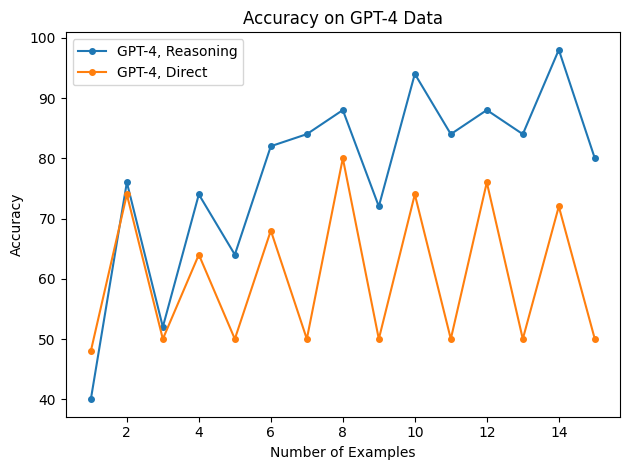

In [829]:
import matplotlib.pyplot as plt

x = [i for i in range(1,16)]

y_gpt_reason = [result[i,50,True,'gpt-4','GPT'][1] for i in range(1,16)]
y_gpt_no_reason = [result[i,50,False,'gpt-4','GPT'][1] for i in range(1,16)]
#y_claude_reason = [result[i,50,True,'gpt-4','Claude'][1] for i in range(1,16)]
#y_claude_no_reason = [result[i,50,False,'gpt-4','Claude'][1] for i in range(1,16)]

size=4
plt.plot(x, y_gpt_reason, label='GPT-4, Reasoning', marker='o',markersize=size)
plt.plot(x, y_gpt_no_reason, label='GPT-4, Direct', marker='o',markersize=size)
#plt.plot(x, y_claude_reason, label='Claude, Reasoning', marker='o',markersize=size)
#plt.plot(x, y_claude_no_reason, label='Claude, Direct', marker='o',markersize=size)

plt.legend(loc='upper left')


plt.title('Accuracy on GPT-4 Data')
plt.xlabel('Number of Examples')
plt.ylabel('Accuracy')

plt.tight_layout()

# Save the plot
plt.savefig("./accuracy_GPT.png")

# Show the plot
plt.show()

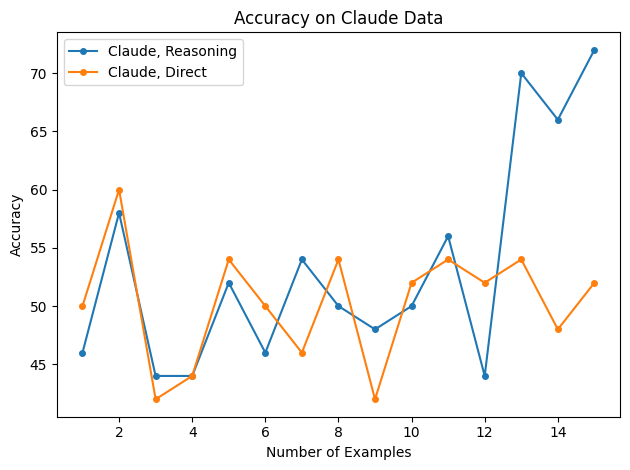

In [830]:
import matplotlib.pyplot as plt

x = [i for i in range(1,16)]

#y_gpt_reason = [result[i,50,True,'gpt-4','GPT'][1] for i in range(1,16)]
#y_gpt_no_reason = [result[i,50,False,'gpt-4','GPT'][1] for i in range(1,16)]
y_claude_reason = [result[i,50,True,'gpt-4','Claude'][1] for i in range(1,16)]
y_claude_no_reason = [result[i,50,False,'gpt-4','Claude'][1] for i in range(1,16)]

size=4
#plt.plot(x, y_gpt_reason, label='GPT-4, Reasoning', marker='o',markersize=size)
#plt.plot(x, y_gpt_no_reason, label='GPT-4, Direct', marker='o',markersize=size)
plt.plot(x, y_claude_reason, label='Claude, Reasoning', marker='o',markersize=size)
plt.plot(x, y_claude_no_reason, label='Claude, Direct', marker='o',markersize=size)

plt.legend(loc='upper left')


plt.title('Accuracy on Claude Data')
plt.xlabel('Number of Examples')
plt.ylabel('Accuracy')

plt.tight_layout()

# Save the plot
plt.savefig("./accuracy_claude.png")

# Show the plot
plt.show()

In [880]:
prop_claude_reason

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.06,
 0.0,
 0.04,
 0.98,
 0.98,
 0.94]

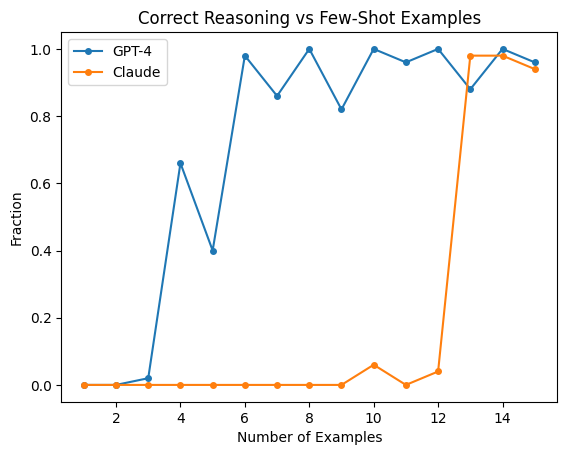

In [879]:
x = [i for i in range(1,16)]

prop_gpt_reason = [sum(all(x in result[r,50,True,'gpt-4','GPT'][0][i][2].lower() for x in ['british','american'])
    for i in range(50))/50. for r in range(1,16)]

prop_claude_reason = [sum(all(x in result[r,50,True,'gpt-4','Claude'][0][i][2].lower() for x in ['british','american'])
    for i in range(50))/50. for r in range(1,16)]
size=4
plt.plot(x, prop_gpt_reason, label='GPT-4',marker='o',markersize=size)
plt.plot(x, prop_claude_reason, label='Claude',marker='o',markersize=size)

plt.legend(loc='upper left')


plt.title('Correct Reasoning vs Few-Shot Examples')
plt.xlabel('Number of Examples')
plt.ylabel('Fraction')

# Save the plot
plt.savefig("./reasoning_plot.png")

# Show the plot
plt.show()

## Reasoning

In [792]:
import os
from openai import OpenAI
API_KEY = os.getenv('OPENAI_API_KEY')  # Retrieve API key from environment variable
client = OpenAI(api_key=API_KEY)

def GPT_reasoning(num_examples,
                     data,
                     model="gpt-4"):
    
    if data=='GPT':
        data_source= GPT_sentences
    elif data =='Claude':
        data_source = claude_sentences
    else:
        return 'Not a valid data source'
    
    few_shot_examples = data_source[:num_examples]
        

    system_message = """You have a series of input and output pairs. The input is a sentence and the output is either True or False.
    Find a general rule to explain the pattern of input/output pairs.
    Output the result in the following format:

    REASONING: {Put your reasoning here}
    """
    
    prompt = convert_all(few_shot_examples)
    

    response = client.chat.completions.create(
        messages=[
            {"role": "system", "content": system_message},
            {"role": "user", "content": prompt},
        ],
        model=model,
        temperature=0,
    )
        
    res = response.choices[0].message.content
    return res

In [ ]:
reasoning_results = {}

for i in range(1,16):
    for source in ['GPT','Claude']:
        print(i,source)
        reasoning_results[i,source] = GPT_reasoning(i,source)

In [794]:
with open('./reasoning.pkl', 'wb') as file:
    pickle.dump(reasoning_results, file)